# Análisis de Componentes Principales

### Docente: M.Sc. Richard Fernández

### Comprensión del negocio 

Objetivo del negocio: Identificar modelos de autos con características similares.

Objetivo de machine learning: Aplicar un modelo de análisis de componentes principales para segmentar los modelos de autos.

### Comprensión de los datos 

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats as ss

from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import scale

In [4]:
data = pd.read_csv('mtcars.csv')

In [5]:
data.head()

,nombre,mpg,cyl,disp,hp,drat,wt,qsec,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,3,2


In [6]:
data.dtypes

nombre     object
mpg       float64
cyl         int64
disp      float64
hp          int64
drat      float64
wt        float64
qsec      float64
gear        int64
carb        int64
dtype: object

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   nombre  32 non-null     object 
 1   mpg     32 non-null     float64
 2   cyl     32 non-null     int64  
 3   disp    32 non-null     float64
 4   hp      32 non-null     int64  
 5   drat    32 non-null     float64
 6   wt      32 non-null     float64
 7   qsec    32 non-null     float64
 8   gear    32 non-null     int64  
 9   carb    32 non-null     int64  
dtypes: float64(5), int64(4), object(1)
memory usage: 2.6+ KB


In [8]:
print('----------------------')
print('Media de cada variable')
print('----------------------')
data.loc[:,['mpg','cyl','disp','hp','drat','wt','qsec','gear','carb']].mean(axis=0)

----------------------
Media de cada variable
----------------------


mpg      20.090625
cyl       6.187500
disp    230.721875
hp      146.687500
drat      3.596563
wt        3.217250
qsec     17.848750
gear      3.687500
carb      2.812500
dtype: float64

In [9]:
print('-------------------------')
print('Varianza de cada variable')
print('-------------------------')
data.loc[:,['mpg','cyl','disp','hp','drat','wt','qsec','gear','carb']].var(axis=0)

-------------------------
Varianza de cada variable
-------------------------


mpg        36.324103
cyl         3.189516
disp    15360.799829
hp       4700.866935
drat        0.285881
wt          0.957379
qsec        3.193166
gear        0.544355
carb        2.608871
dtype: float64

Se deben de estandarizar las variables para que tengan media cero y desviación estándar uno antes de aplicar Análisis de Componentes Principales, pues las variables disp y hp tienen una media y dispersión muy superior al resto. Esta estandarización evita que las variables disp y hp dominen la mayoría de las componentes principales.


In [10]:
#Prueba de normalidad
#Ho: la variable se aproxima a una distribución normal
#Ha: la variable no se aproxima a una distribución normal

In [11]:
ss.shapiro(data.mpg)

ShapiroResult(statistic=0.9475648403167725, pvalue=0.1228824257850647)

In [12]:
ss.shapiro(data.cyl)

ShapiroResult(statistic=0.7533102035522461, pvalue=6.058378858142532e-06)

In [13]:
ss.shapiro(data.disp)

ShapiroResult(statistic=0.9200125932693481, pvalue=0.020806454122066498)

In [14]:
ss.shapiro(data.hp)

ShapiroResult(statistic=0.9334192276000977, pvalue=0.048807866871356964)

In [15]:
ss.shapiro(data.drat)

ShapiroResult(statistic=0.9458838701248169, pvalue=0.11006041616201401)

In [16]:
ss.shapiro(data.wt)

ShapiroResult(statistic=0.9432573914527893, pvalue=0.09265287965536118)

In [17]:
ss.shapiro(data.qsec)

ShapiroResult(statistic=0.9732509851455688, pvalue=0.5935186743736267)

In [18]:
ss.shapiro(data.gear)

ShapiroResult(statistic=0.7727859020233154, pvalue=1.3068596672383137e-05)

In [19]:
ss.shapiro(data.carb)

ShapiroResult(statistic=0.851097583770752, pvalue=0.0004382486513350159)

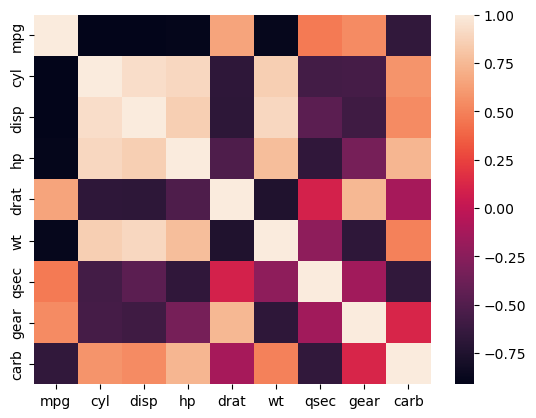

In [20]:
#Heatmap
sns.heatmap(data.loc[:,['mpg','cyl','disp','hp','drat','wt','qsec','gear','carb']].corr(method = "spearman"))
plt.show()

In [21]:
data.loc[:,['mpg','cyl','disp','hp','drat','wt','qsec','gear','carb']].corr(method = "spearman")

,mpg,cyl,disp,hp,drat,wt,qsec,gear,carb
mpg,1.000000,-0.910801,-0.908882,-0.894665,0.651455,-0.886422,0.466936,0.542782,-0.657498
cyl,-0.910801,1.000000,0.927652,0.901791,-0.678881,0.857728,-0.572351,-0.564310,0.580068
disp,-0.908882,0.927652,1.000000,0.851043,-0.683592,0.897706,-0.459782,-0.594470,0.539778
hp,-0.894665,0.901791,0.851043,1.000000,-0.520125,0.774677,-0.666606,-0.331402,0.733379
drat,0.651455,-0.678881,-0.683592,-0.520125,1.000000,-0.750390,0.091869,0.744816,-0.125223
wt,-0.886422,0.857728,0.897706,0.774677,-0.750390,1.000000,-0.225401,-0.676128,0.499812
qsec,0.466936,-0.572351,-0.459782,-0.666606,0.091869,-0.225401,1.000000,-0.148200,-0.658718
gear,0.542782,-0.564310,-0.594470,-0.331402,0.744816,-0.676128,-0.148200,1.000000,0.114887
carb,-0.657498,0.580068,0.539778,0.733379,-0.125223,0.499812,-0.658718,0.114887,1.000000


In [22]:
#Prueba de Correlación
#Ho: no existe correlación entre las variables
#Ha: existe correlación entre las variables

In [23]:
ss.spearmanr(data['mpg'],data['cyl'])

SignificanceResult(statistic=-0.9108013108624786, pvalue=4.690287037356223e-13)

In [24]:
ss.spearmanr(data['mpg'],data['disp'])

SignificanceResult(statistic=-0.9088823637364655, pvalue=6.370336284303276e-13)

In [25]:
ss.spearmanr(data['mpg'],data['hp'])

SignificanceResult(statistic=-0.8946646457499626, pvalue=5.085969430924412e-12)

In [26]:
#Prueba de esferecidad de Barlett
#Ho: Las variables no están correlacionadas
#Ha: Las variables están correlacionadas
ss.bartlett(data.mpg,data.cyl,data.disp,data.hp,data.drat,data.wt,data.qsec,data.gear,data.carb)

BartlettResult(statistic=1419.6320995331234, pvalue=3.2205454067076615e-301)

### Preparación de los datos 

In [27]:
data.head()

,nombre,mpg,cyl,disp,hp,drat,wt,qsec,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,3,2


In [28]:
data_scaled = StandardScaler().fit_transform(data.loc[:,['mpg','cyl','disp','hp','drat','wt','qsec','gear','carb']])

In [29]:
data_scaled[0:5]

array([[ 0.15329914, -0.10666772, -0.57975032, -0.54365487,  0.57659448,
        -0.62016658, -0.78960058,  0.43033148,  0.74696708],
       [ 0.15329914, -0.10666772, -0.57975032, -0.54365487,  0.57659448,
        -0.35538219, -0.47120178,  0.43033148,  0.74696708],
       [ 0.4567366 , -1.24445674, -1.00602601, -0.7955699 ,  0.48158406,
        -0.93167763,  0.43282336,  0.43033148, -1.14010764],
       [ 0.22072968, -0.10666772,  0.22361542, -0.54365487, -0.98157639,
        -0.00233633,  0.90473586, -0.94672926, -1.14010764],
       [-0.23442651,  1.0311213 ,  1.05977159,  0.41954967, -0.84856181,
         0.23129695, -0.47120178, -0.94672926, -0.51108274]])

### Modelado

In [30]:
#Entrenamiento del modelo de Análisis de Componentes Principales
pca_pipe = make_pipeline(StandardScaler(), PCA())
pca_pipe.fit(data.loc[:,['mpg','cyl','disp','hp','drat','wt','qsec','gear','carb']])

Pipeline(steps=[('standardscaler', StandardScaler()), ('pca', PCA())])

In [31]:
#Se extrae el modelo entrenado del pipeline
modelo_pca = pca_pipe.named_steps['pca']

In [32]:
# Se comvierte el array a un dataframe
pd.DataFrame(
    data    = modelo_pca.components_,
    columns = data.loc[:,['mpg','cyl','disp','hp','drat','wt','qsec','gear','carb']].columns,
    index   = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9']
)

,mpg,cyl,disp,hp,drat,wt,qsec,gear,carb
PC1,0.393148,-0.402554,-0.397353,-0.367081,0.311817,-0.373477,0.224351,0.209475,-0.244581
PC2,0.027539,0.015710,-0.088885,0.269414,0.341653,-0.171943,-0.484044,0.550783,0.484313
PC3,-0.221193,-0.252316,-0.078251,-0.017212,0.149955,0.453734,0.628128,0.206584,0.464121
PC4,-0.006126,0.040700,0.339494,0.068301,0.845658,0.191260,-0.030329,-0.282382,-0.214492
PC5,0.320762,-0.117140,0.486785,0.294732,-0.161926,0.187482,0.148250,0.562486,-0.399782
PC6,0.720156,0.224325,-0.019675,0.353942,-0.015368,-0.083772,0.257529,-0.322982,0.357069
PC7,-0.381381,-0.158933,-0.182331,0.696208,0.047680,-0.427776,0.276226,-0.085557,-0.206042
PC8,-0.124660,0.810322,-0.064167,-0.165740,0.135051,-0.198394,0.356133,0.316365,-0.108328
PC9,0.114929,0.162663,-0.661908,0.251773,0.038091,0.569188,-0.168737,0.047197,-0.320459


##### La primera componente es el resultado de la siguiente combinación lineal de las variables originales:
##### PC1 = 0.393148mpg-0.402554cyl-0.397353disp-0.367081hp+0.311817drat-0.373477wt+0.224351qsec+0.209475gear-0.244581carb

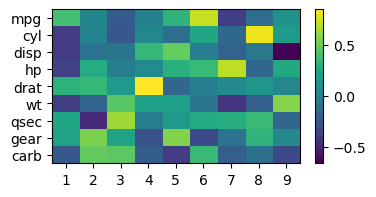

In [33]:
#Heatmap de componentes principales
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(4, 2))
componentes = modelo_pca.components_
plt.imshow(componentes.T, cmap='viridis', aspect='auto')
plt.yticks(range(len(data.loc[:,['mpg','cyl','disp','hp','drat','wt','qsec','gear','carb']].columns)), 
           data.loc[:,['mpg','cyl','disp','hp','drat','wt','qsec','gear','carb']].columns)
plt.xticks(range(len(data.loc[:,['mpg','cyl','disp','hp','drat','wt','qsec','gear','carb']].columns)), np.arange(modelo_pca.n_components_) + 1)
plt.grid(False)
plt.colorbar();

### Evaluación 

----------------------------------------------------
Porcentaje de varianza explicada por cada componente
----------------------------------------------------
[0.62843772 0.23134448 0.05602387 0.0294475  0.02035096 0.0137548
 0.01167355 0.00650153 0.0024656 ]


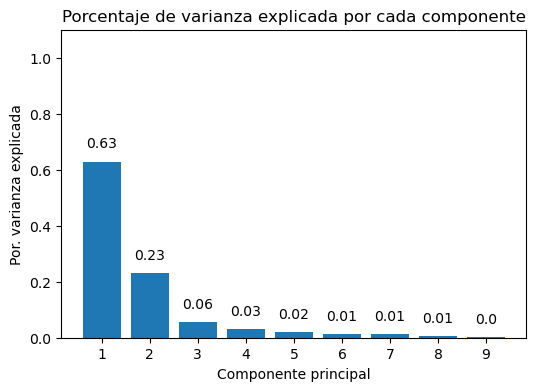

In [34]:
# Porcentaje de varianza explicada por cada componente
# ==============================================================================
print('----------------------------------------------------')
print('Porcentaje de varianza explicada por cada componente')
print('----------------------------------------------------')
print(modelo_pca.explained_variance_ratio_)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 4))
ax.bar(
    x      = np.arange(modelo_pca.n_components_) + 1,
    height = modelo_pca.explained_variance_ratio_
)

for x, y in zip(np.arange(len(data.loc[:,['mpg','cyl','disp','hp','drat','wt','qsec','gear','carb']].columns)) + 1, modelo_pca.explained_variance_ratio_):
    label = round(y, 2)
    ax.annotate(
        label,
        (x,y),
        textcoords="offset points",
        xytext=(0,10),
        ha='center'
    )

ax.set_xticks(np.arange(modelo_pca.n_components_) + 1)
ax.set_ylim(0, 1.1)
ax.set_title('Porcentaje de varianza explicada por cada componente')
ax.set_xlabel('Componente principal')
ax.set_ylabel('Por. varianza explicada');

------------------------------------------
Porcentaje de varianza explicada acumulada
------------------------------------------
[0.62843772 0.8597822  0.91580607 0.94525357 0.96560453 0.97935933
 0.99103287 0.9975344  1.        ]


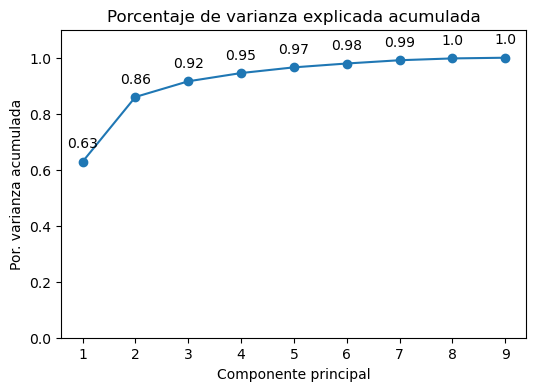

In [35]:
# Porcentaje de varianza explicada acumulada
# ==============================================================================
prop_varianza_acum = modelo_pca.explained_variance_ratio_.cumsum()
print('------------------------------------------')
print('Porcentaje de varianza explicada acumulada')
print('------------------------------------------')
print(prop_varianza_acum)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 4))
ax.plot(
    np.arange(len(data.loc[:,['mpg','cyl','disp','hp','drat','wt','qsec','gear','carb']].columns)) + 1,
    prop_varianza_acum,
    marker = 'o'
)

for x, y in zip(np.arange(len(data.loc[:,['mpg','cyl','disp','hp','drat','wt','qsec','gear','carb']].columns)) + 1, prop_varianza_acum):
    label = round(y, 2)
    ax.annotate(
        label,
        (x,y),
        textcoords="offset points",
        xytext=(0,10),
        ha='center'
    )
    
ax.set_ylim(0, 1.1)
ax.set_xticks(np.arange(modelo_pca.n_components_) + 1)
ax.set_title('Porcentaje de varianza explicada acumulada')
ax.set_xlabel('Componente principal')
ax.set_ylabel('Por. varianza acumulada');

In [36]:
print(modelo_pca.explained_variance_ratio_)

[0.62843772 0.23134448 0.05602387 0.0294475  0.02035096 0.0137548
 0.01167355 0.00650153 0.0024656 ]


In [37]:
print(modelo_pca.explained_variance_)

[5.83838913 2.14926482 0.52047982 0.2735768  0.18906698 0.12778652
 0.10845102 0.06040129 0.0229062 ]


In [38]:
var_explicada = pd.DataFrame(modelo_pca.explained_variance_)
var_explicada.columns = ['var_explicada']
var_explicada = var_explicada.T
var_explicada.columns = ['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9']

prop_var_explicada = pd.DataFrame(modelo_pca.explained_variance_ratio_)
prop_var_explicada.columns = ['prop_var_explicada']
prop_var_explicada = prop_var_explicada.T
prop_var_explicada.columns = ['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9']

In [39]:
var_explicada

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9
var_explicada,5.838389,2.149265,0.52048,0.273577,0.189067,0.127787,0.108451,0.060401,0.022906


In [40]:
prop_var_explicada

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9
prop_var_explicada,0.628438,0.231344,0.056024,0.029448,0.020351,0.013755,0.011674,0.006502,0.002466


In [41]:
# Proyección de las observaciones de entrenamiento
componentes = pca_pipe.transform(X = data.loc[:,['mpg','cyl','disp','hp','drat','wt','qsec','gear','carb']])

In [42]:
componentes = pd.DataFrame(componentes)

In [43]:
componentes.columns = ['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9']

In [44]:
componentes.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9
0,0.674852,1.192224,-0.207587,-0.128034,-0.764041,-0.127069,-0.430351,-0.003311,-0.169724
1,0.647394,0.992577,0.112550,-0.087048,-0.667196,-0.067254,-0.455669,0.057550,-0.072738
2,2.336534,-0.331815,-0.213512,-0.110363,0.077443,-0.576008,0.392302,-0.205269,0.116337
3,0.218742,-2.008441,-0.334740,-0.312992,0.247821,0.085166,0.033522,-0.024094,-0.147580
4,-1.612367,-0.841989,-1.049521,0.149742,0.226268,0.185729,-0.058865,0.154780,-0.157121


In [45]:
componentes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   PC1     32 non-null     float64
 1   PC2     32 non-null     float64
 2   PC3     32 non-null     float64
 3   PC4     32 non-null     float64
 4   PC5     32 non-null     float64
 5   PC6     32 non-null     float64
 6   PC7     32 non-null     float64
 7   PC8     32 non-null     float64
 8   PC9     32 non-null     float64
dtypes: float64(9)
memory usage: 2.4 KB


In [46]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   nombre  32 non-null     object 
 1   mpg     32 non-null     float64
 2   cyl     32 non-null     int64  
 3   disp    32 non-null     float64
 4   hp      32 non-null     int64  
 5   drat    32 non-null     float64
 6   wt      32 non-null     float64
 7   qsec    32 non-null     float64
 8   gear    32 non-null     int64  
 9   carb    32 non-null     int64  
dtypes: float64(5), int64(4), object(1)
memory usage: 2.6+ KB


### Implementación

In [47]:
dataf = pd.concat([data.loc[:,['nombre']],componentes.loc[:,['PC1','PC2']]], axis = 1)

In [48]:
dataf.head()

,nombre,PC1,PC2
0,Mazda RX4,0.674852,1.192224
1,Mazda RX4 Wag,0.647394,0.992577
2,Datsun 710,2.336534,-0.331815
3,Hornet 4 Drive,0.218742,-2.008441
4,Hornet Sportabout,-1.612367,-0.841989


In [49]:
ss.spearmanr(dataf['PC1'],dataf['PC2'])

SignificanceResult(statistic=0.18328445747800584, pvalue=0.3153295682569576)

In [50]:
dataf.to_csv('D:/dataf.csv', index = False)